<a href="https://colab.research.google.com/github/spjoshis/digit-recognizer/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST dataset (Recognize Digits)

Source : [Kaggle Dataset](https://www.kaggle.com/c/digit-recognizer)

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.


In [1]:
# Import packages
!pip install kaggle
import json
import zipfile
import os
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


In [5]:
# Import dataset
api_token = {"username":"gopalj","key":"9e3277469f507dfb47b3a20d30a32b42"}
!mkdir /root/.kaggle
!echo '{"username":"","key":""}' > /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!kaggle competitions download -c digit-recognizer

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 87% 8.00M/9.16M [00:00<00:00, 79.9MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.5MB/s]
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 54.7MB/s]


In [6]:
%%bash
mv /content/test.csv.zip /content/test.zip
mv /content/train.csv.zip /content/train.zip

In [7]:
# Unzip saample data
zipper = zipfile.ZipFile('/content/test.zip', 'r')
zipper.extractall()
zipper.close()

zipper = zipfile.ZipFile('/content/train.zip', 'r')
zipper.extractall()
zipper.close()

In [8]:
# Prepare dataset
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

# Training labels set
y_train = train_data['label']
x_train = train_data.drop(labels=['label'], axis=1)

In [9]:
# Normalizing data & Reshaping the data
x_train = x_train/255.0
test_data = test_data/255.0

x_train = x_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [10]:
from sklearn.model_selection import train_test_split

X1_train,Y1_train,X2_train,Y2_train=train_test_split(x_train,y_train,test_size = 0.3, random_state=2)

In [11]:
#Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),                      
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])


In [12]:
results = model.evaluate(Y1_train, Y2_train, batch_size=32)

394/394 [==============================] - 4s 10ms/step - loss: 2.3033 - accuracy: 0.0990


In [13]:
history = model.fit(
    X1_train,
    X2_train,
    batch_size=32,
    epochs=15,
    validation_data=(Y1_train, Y2_train),
)

Epoch 1/15
919/919 [==============================] - 36s 39ms/step - loss: 0.5278 - accuracy: 0.8288 - val_loss: 0.1717 - val_accuracy: 0.9464
Epoch 2/15
919/919 [==============================] - 35s 39ms/step - loss: 0.1783 - accuracy: 0.9467 - val_loss: 0.1128 - val_accuracy: 0.9652
Epoch 3/15
919/919 [==============================] - 35s 38ms/step - loss: 0.1321 - accuracy: 0.9604 - val_loss: 0.1040 - val_accuracy: 0.9667
Epoch 4/15
919/919 [==============================] - 35s 38ms/step - loss: 0.1073 - accuracy: 0.9683 - val_loss: 0.0890 - val_accuracy: 0.9729
Epoch 5/15
919/919 [==============================] - 35s 38ms/step - loss: 0.0896 - accuracy: 0.9737 - val_loss: 0.0842 - val_accuracy: 0.9740
Epoch 6/15
919/919 [==============================] - 35s 39ms/step - loss: 0.0797 - accuracy: 0.9762 - val_loss: 0.0956 - val_accuracy: 0.9707
Epoch 7/15
919/919 [==============================] - 36s 39ms/step - loss: 0.0721 - accuracy: 0.9776 - val_loss: 0.0936 - val_accuracy:

<Figure size 432x288 with 0 Axes>

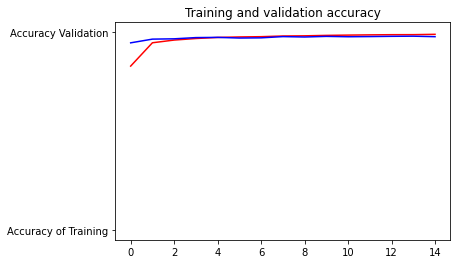

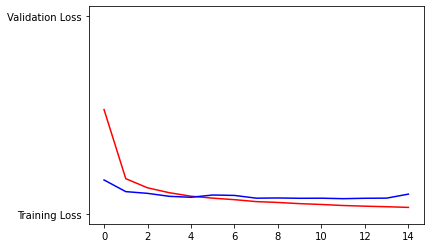

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Accuracy of Training")
plt.plot(epochs, val_acc, 'b', "Accuracy Validation")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


In [15]:
predicted_classes = model.predict_classes(test_data)
predicted_classes


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 0, 9, ..., 3, 9, 2])

In [16]:
submissions = pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("submission.csv", index=False, header=True)

In [ ]:
#Kills google collab instance
import os, signal
os.kill(os.getpid(), signal.SIGKILL)